<a href="https://colab.research.google.com/github/OJO44/24bMachineLearning1/blob/main/DataPreparationProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [ ]:
data= "/content/chip_dataset.csv"
chip = pd.read_csv(data)
chip.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


Inspecting data

In [ ]:
chip.shape

(4945, 13)

In [ ]:
chip.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [ ]:
chip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [ ]:
# Convert numerical variables to numeric
chip["Process Size (nm)"]= pd.to_numeric(chip["Process Size (nm)"], errors="coerce")
chip["Die Size (mm^2)"] = pd.to_numeric(chip['Die Size (mm^2)'], errors="coerce")
chip["TDP (W))"] = pd.to_numeric(chip["TDP (W)"], errors="coerce")
chip["Freq (GHz)"] = pd.to_numeric(chip["Freq (GHz)"], errors="coerce")
chip["Transistors (million)"] = pd.to_numeric(chip["Transistors (million)"], errors="coerce")
chip["Release Date"] = pd.to_datetime(chip["Transistors (million)"], errors = "coerce")




In [ ]:
chip.dtypes

Product                          object
Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                          object
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (GHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
TDP (W))                        float64
dtype: object

Handling Missingness

In [ ]:
# Identify and handle missing values
chip.isnull().sum()

Product                     0
Type                        0
Release Date              806
Process Size (nm)          58
TDP (W)                   437
Die Size (mm^2)           716
Transistors (million)     806
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
TDP (W))                  891
dtype: int64

In [ ]:
#For release dates, I will drop the the rows with missing values.
chip = chip.dropna(subset=["Release Date"])
chip.dtypes

Product                          object
Type                             object
Release Date             datetime64[ns]
Process Size (nm)               float64
TDP (W)                          object
Die Size (mm^2)                 float64
Transistors (million)           float64
Freq (GHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
TDP (W))                        float64
dtype: object

In [ ]:
 #Impute missing values in the "Foundry" column with the mode
chip["Foundry"].fillna(chip["Foundry"].mode()[0], inplace=True) #this is because foundry is a categorical type of variable


In [ ]:
#Handling missingness in numerical variables
#TDP(W)
#Die Size(mm2)
#Transistors
#Freq(GHz)
#FP16 GFLOPS
#FP32 GFLOPS
#FP64 GFLOPS

In [ ]:
#Drop the following columns
#FP16 GFLOPS
#FP32 GFLOPS
#FP64 GFLOPS
chip = chip.drop(["FP16 GFLOPS", "FP32 GFLOPS", "FP64 GFLOPS"], axis = 1)
chip.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,TDP (W)),Die Size (mm^2
0,AMD Athlon 1000,CPU,1970-01-01 00:00:00.000000037,180.0,54.0,120.0,37.0,1000.0,NaN,AMD,54.0,120.0
1,AMD Athlon 1000,CPU,1970-01-01 00:00:00.000000037,180.0,54.0,120.0,37.0,1000.0,NaN,AMD,54.0,120.0
2,AMD Athlon 1100,CPU,1970-01-01 00:00:00.000000037,180.0,60.0,120.0,37.0,1100.0,NaN,AMD,60.0,120.0
3,AMD Athlon 1133,CPU,1970-01-01 00:00:00.000000037,180.0,63.0,120.0,37.0,1133.0,NaN,AMD,63.0,120.0
4,AMD Athlon 1200,CPU,1970-01-01 00:00:00.000000037,180.0,66.0,120.0,37.0,1200.0,NaN,AMD,66.0,120.0


In [ ]:
#For these other columns having numerical variable, based on my observations, I will fill them with means
#TDP(W)
#Die Size(mm2)
#Transistors
#Freq(GHz)
#'Die Size (mm^2'
# First, fill null values with 0
chip["Process Size (nm)"] = chip["Process Size (nm)"].fillna(0)
print(chip["Process Size (nm)"].median())
chip["TDP (W))"] = pd.to_numeric(chip["TDP (W)"], errors="coerce")
chip["TDP (W)"] = chip["TDP (W)"].fillna(0)
#print(chip["TDP (W)"].median())
chip['Transistors (million)'] = chip['Transistors (million)'].fillna(0)
print(chip['Transistors (million)'].median())
chip['Freq (GHz)'] = chip['Freq (GHz)'].fillna(0)
print(chip['Freq (GHz)'].median())
chip['Die Size (mm^2'] = chip['Die Size (mm^2)'].fillna(0)
print(chip['Die Size (mm^2'].median())

28.0
456.0
1155.0
146.0


In [ ]:
# Replace empty strings with NaN
chip["TDP (W)"] = chip["TDP (W)"].str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan)

# Convert the column to float, filling NaN with 0
chip["TDP (W)"] = chip["TDP (W)"].astype(float).fillna(0)

# Check the data type
print(chip["TDP (W)"].dtypes)

# Calculate the mean
print(chip["TDP (W)"].median())

float64
50.0


In [ ]:
chip.isnull().sum()

Product                    0
Type                       0
Release Date             806
Process Size (nm)          0
TDP (W)                    0
Die Size (mm^2)          716
Transistors (million)      0
Freq (GHz)                 0
Foundry                  615
Vendor                     0
TDP (W))                 454
Die Size (mm^2             0
dtype: int64

In [ ]:

chip.isnull().sum()

# Step 5: Analyze and visualize the data to validate the assumptions

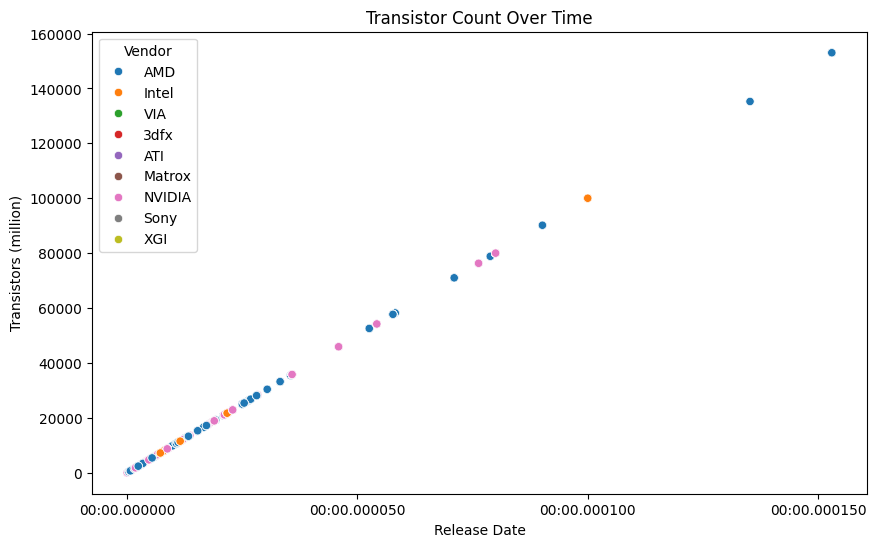

In [ ]:

# Assumption 1 : Moore's Law still holds, especially in GPUs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chip, x='Release Date', y='Transistors (million)', hue='Vendor')
plt.title("Transistor Count Over Time")
plt.show()

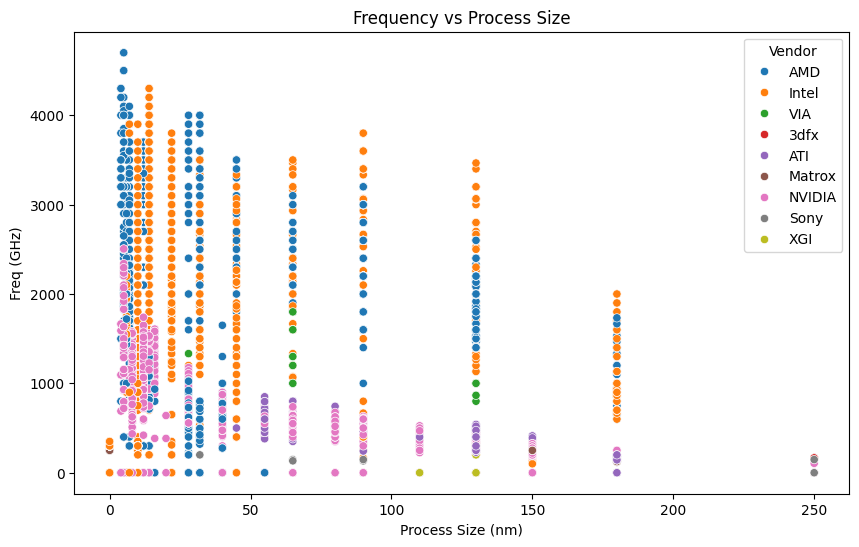

In [ ]:
# Assumption 2: Dannard Scaling is still valid in general
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chip, x='Process Size (nm)', y='Freq (GHz)', hue='Vendor')
plt.title("Frequency vs Process Size")
plt.show()

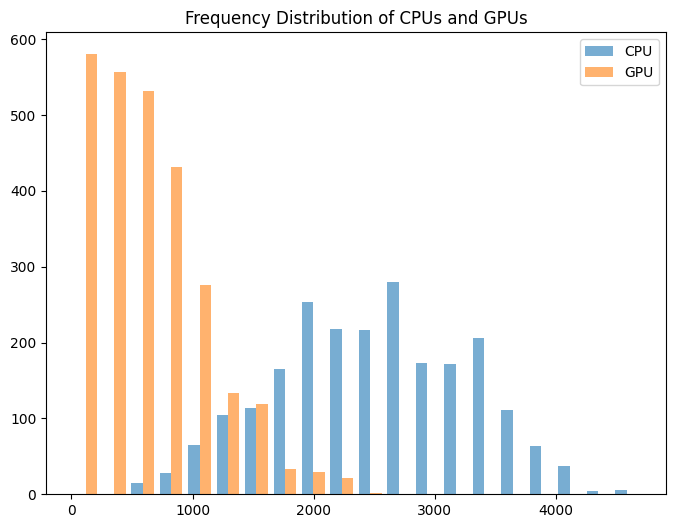

In [ ]:

# Assumption 3: CPUs have higher frequencies, but GPUs are catching up
cpu_freq = chip[chip['Type'] == 'CPU']['Freq (GHz)']
gpu_freq = chip[chip['Type'] == 'GPU']['Freq (GHz)']
plt.figure(figsize=(8, 6))
plt.hist([cpu_freq, gpu_freq], bins=20, label=['CPU', 'GPU'], alpha=0.6)
plt.legend()
plt.title("Frequency Distribution of CPUs and GPUs")
plt.show()

<ipython-input-20-cdc279e18cb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_data['Release Date'] = pd.to_datetime(gpu_data['Release Date'], errors='coerce')
<ipython-input-20-cdc279e18cb3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_data['Release Year'] = gpu_data['Release Date'].dt.year
<ipython-input-20-cdc279e18cb3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

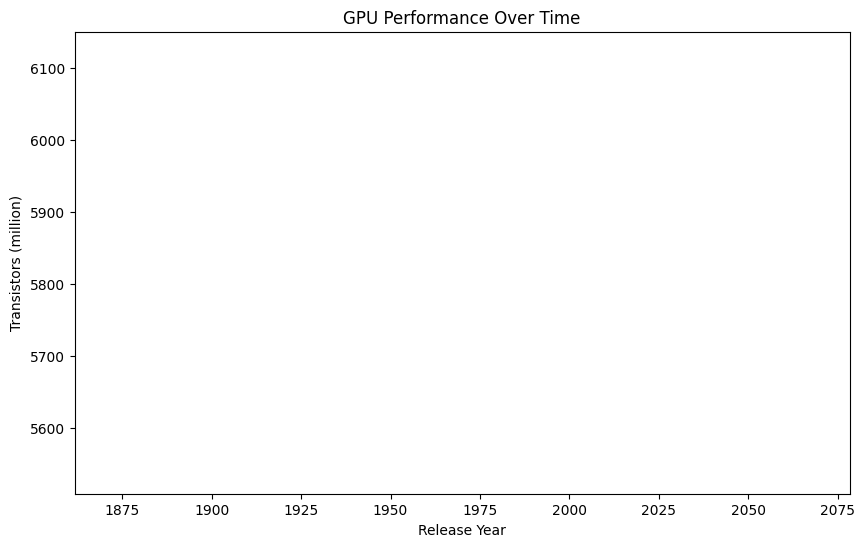

In [ ]:
# Assumption 4: GPU performance doubles every 1.5 years
# Convert 'Release Date' to a datetime object
gpu_data = chip[chip['Type'] == 'GPU']
gpu_data['Release Date'] = pd.to_datetime(gpu_data['Release Date'], errors='coerce')

# Extract the year from the 'Release Date' column
gpu_data['Release Year'] = gpu_data['Release Date'].dt.year

# Convert 'Transistors (million)' to a numeric type
gpu_data['Transistors (million)'] = pd.to_numeric(gpu_data['Transistors (million)'], errors='coerce')

# Group by 'Release Year' and calculate the mean 'Transistors (million)'
gpu_perf = gpu_data.groupby('Release Year')['Transistors (million)'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=gpu_perf, x='Release Year', y='Transistors (million)')
plt.title("GPU Performance Over Time")
plt.show()

<Figure size 1200x800 with 0 Axes>

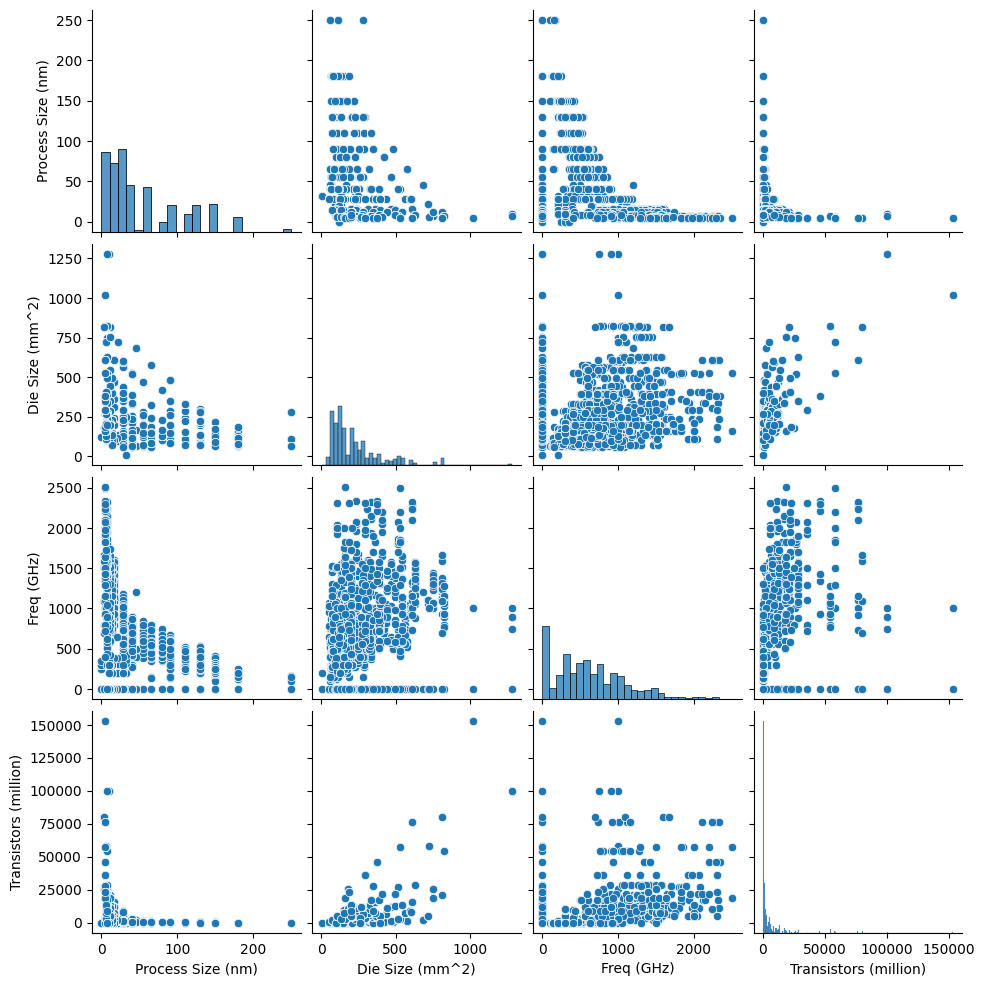

In [ ]:

# Assumption 5: GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency
plt.figure(figsize=(12, 8))
sns.pairplot(data=chip[chip['Type'] == 'GPU'], vars=['Process Size (nm)', 'Die Size (mm^2)', 'Freq (GHz)', 'Transistors (million)'])
plt.show()

<ipython-input-18-6e711f5d8533>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_end_gpus['Process Size (nm)'], label='High-end GPUs', shade=True)
<ipython-input-18-6e711f5d8533>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_end_gpus['Process Size (nm)'], label='Low-end GPUs', shade=True)


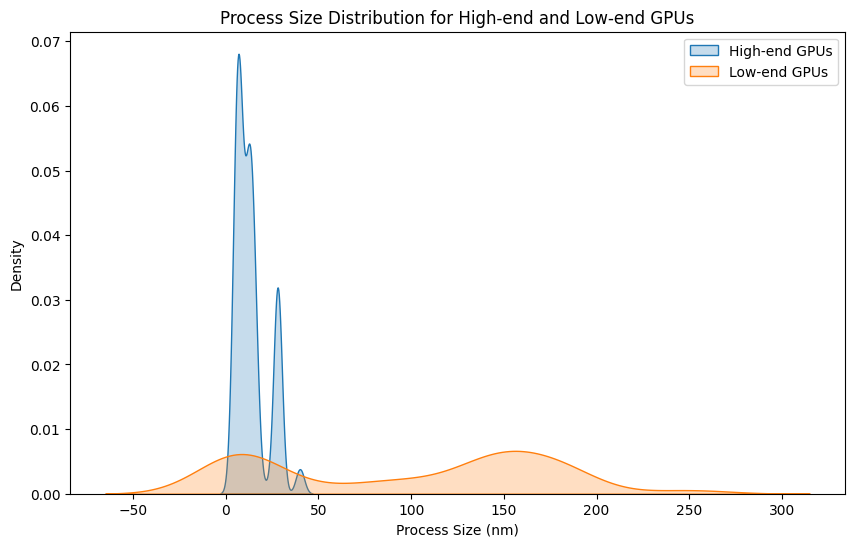

In [ ]:

# Assumption 6: High-end GPUs tend to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.
high_end_gpus = chip[(chip['Type'] == 'GPU') & (chip['Transistors (million)'] > chip['Transistors (million)'].quantile(0.75))]
low_end_gpus = chip[(chip['Type'] == 'GPU') & (chip['Transistors (million)'] < chip['Transistors (million)'].quantile(0.25))]
plt.figure(figsize=(10, 6))
sns.kdeplot(high_end_gpus['Process Size (nm)'], label='High-end GPUs', shade=True)
sns.kdeplot(low_end_gpus['Process Size (nm)'], label='Low-end GPUs', shade=True)
plt.title("Process Size Distribution for High-end and Low-end GPUs")
plt.legend()
plt.show()


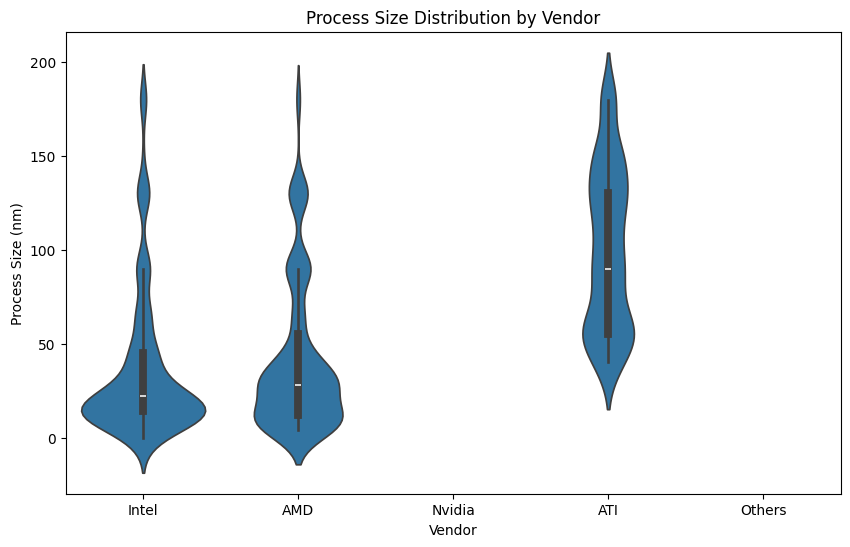

In [ ]:
# Assumption 7: Process Size for Intel, AMD, and Nvidia lies in a comparatively lower range than for ATI and other vendors
plt.figure(figsize=(10, 6))
sns.violinplot(data=chip, x='Vendor', y='Process Size (nm)', order=['Intel', 'AMD', 'Nvidia', 'ATI', 'Others'])
plt.title("Process Size Distribution by Vendor")
plt.show()


In [ ]:

# Assumption 8: TSMC makes the highest number of chips in the world
foundry_counts = chip['Foundry'].value_counts()
print(foundry_counts)

# Step 4: Calculate and visualize correlations among features
plt.figure(figsize=(12, 10))
corr_matrix = chip.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

# Step 5: Perform appropriate encoding for modeling
chip = pd.get_dummies(chip, columns=['Type', 'Vendor', 'Foundry'])